<a href="https://colab.research.google.com/github/Thing-ji/examples/blob/main/%EC%84%BC%EC%84%9C%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

센서정보를 이용한 패턴인식

 온도/습도/기압에 따라 지수가 좋고(1) 그렇지 않음(0)을 인식합니다.
 본 프로그램은 머신러닝 수업 개별 프로잭트 발표자료이며 캐글에서 가져온 data입니다.
 
 https://www.kaggle.com/yungbyun/sensor-data-analysis/data

In [ ]:
import os  # OS : operating system의 약자로 운영체제를 의미한다.
import sys
from pandas import Series
import pandas as pd
import numpy as np
import traceback # traceback 이란 오류를 발생시킨 함수 호출을 역추적한 내용
import time
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


사이킷 런 머신러닝 패키지(모듈)을 임포트합니다.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# import RPi.GPIO as GPIO
# from Adafruit_BME280 import *
# import paho.mqtt.publish as publish

In [ ]:
df = pd.DataFrame(columns = ['Date', 'Temperature', 'Humidity', 'Pressure'])
iteri = 0

In [ ]:
degrees = 0
fah = 0
hectopascals = 0
humidity = 0
global iteri # 프로그램 전체에서 유효한 전역변수(Global Variable), 함수의 코드블록 안에서만 유효한 지역변수(Local Variable)
global df  

### 데이터 로드 및 확인

 폴더에 있는 파일을 확인합니다.

In [ ]:
# print(os.listdir('../input'))# 특정 폴더에 있는 .py 파일만 가져와보자.
data = pd.read_csv('pandas_simple.csv')
data.head()

,Date,Temperature,Humidity,Pressure,class
0,5/21/2019 4:43,79.705149,29.763173,971.557684,1
1,5/21/2019 4:43,79.611960,29.644341,971.594328,1
2,5/21/2019 4:43,79.602869,29.584354,971.582935,1
3,5/21/2019 4:43,79.600596,29.668567,971.561229,1
4,5/21/2019 4:43,79.589232,29.668746,971.584034,1


In [ ]:
data['Pressure'].min()

970.0651999

특징 수와 데이터 인스턴스 수 등 데이터 모양을 확인합니다.

In [ ]:
print('Shape of the data set: ' + str(data.shape))

Shape of the data set: (100700, 5)


각 컬럼(특징)별 객수, 평균값, 최소/최대값, 분산값 등 통계정보를 보여줍니다.

In [ ]:
print('describe: ')
print(data.describe())

describe: 
         Temperature       Humidity       Pressure          class
count  100700.000000  100700.000000  100700.000000  100700.000000
mean       78.655029      24.873992     971.047191       0.568759
std         1.542127       2.725325       0.553030       0.495252
min        76.512917      18.565907     970.065200       0.000000
25%        77.281137      23.370627     970.548079       0.000000
50%        78.361880      25.432319     971.085230       1.000000
75%        79.771346      27.054893     971.528416       1.000000
max       108.966686      36.778259     996.029714       1.000000


In [ ]:
print('info: ')
print(data.info())

info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100700 entries, 0 to 100699
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Date         100700 non-null  object 
 1   Temperature  100700 non-null  float64
 2   Humidity     100700 non-null  float64
 3   Pressure     100700 non-null  float64
 4   class        100700 non-null  int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 3.8+ MB
None


nul값은 없는걸로 확인하였다.

### 데이터 표시하기

 온도 정보가 어떻게 달라지는지 표시합니다. 참고로 데이터는 2일동안 매초 마다 흭득한 온도/습도/기압 정보입니다.

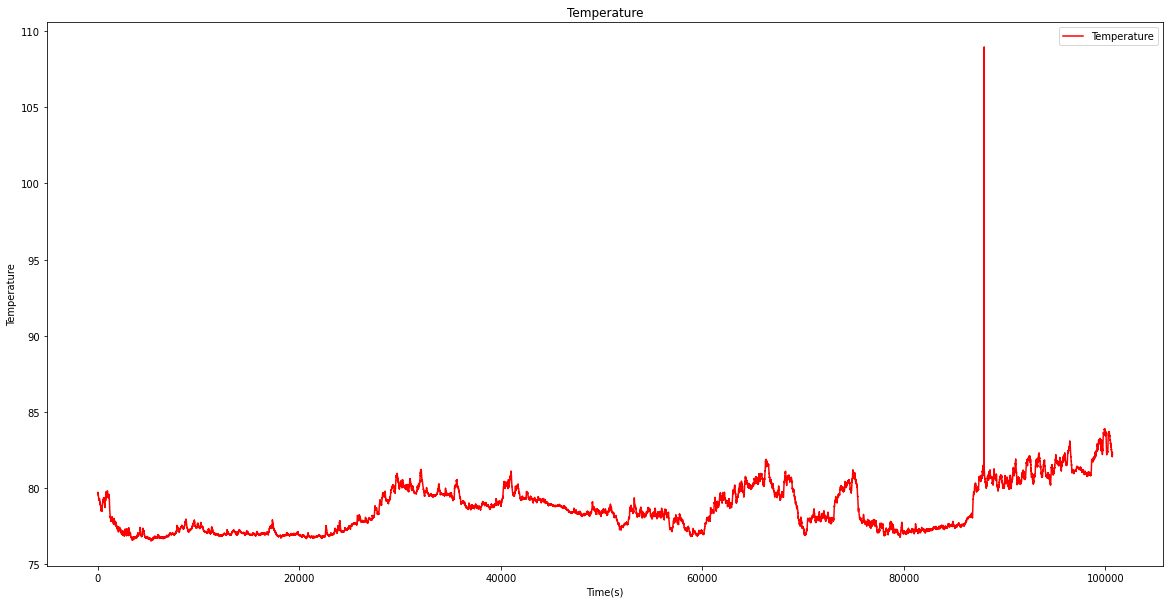

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10) # rcParams 설정을 활용하면, 차트의 크기와 선의 색, 두께등의 기본 값을 설정할 수 있다.
plt.title('Temperature')
plt.xlabel('Time(s)')
plt.ylabel('Temperature')
ax = data['Temperature']
plt.plot(ax, label = 'Temperature', color = 'red' )
plt.legend()

In [ ]:
maximum = data['Temperature'].max()
minimum = data['Temperature'].min()
average = data['Temperature'].mean()

print('Maximum : ', maximum, "(Temperature)")
print('Minimum : ', minimum, "(Temperature)")
print('Average : ', average, "(Temperature)")

Maximum :  108.9666861 (Temperature)
Minimum :  76.51291657 (Temperature)
Average :  78.6550291487504 (Temperature)


습도는 어떻게 달라지는지 표시해 봅시다.

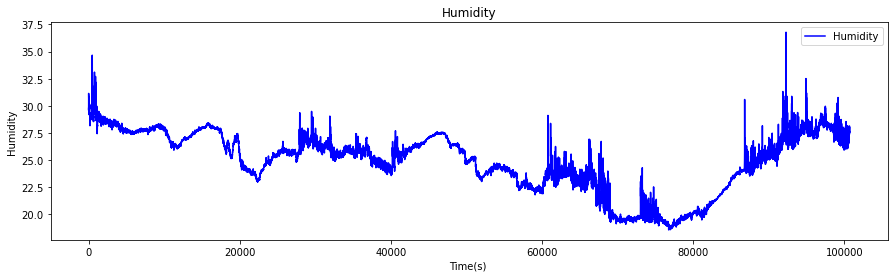

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.title('Humidity')
plt.xlabel('Time(s) ')
plt.ylabel('Humidity')
ax = data['Humidity']
plt.plot(ax, label = 'Humidity', color = 'blue')
plt.legend()

습도의 최대/최소/평균값 알아보기

In [ ]:
maximum = data['Humidity'].max()
minimun = data['Humidity'].min()
average = data['Humidity'].mean()

print('Maximum: ', maximum, '(Humidity)')
print('Minimum: ', minimum, '(Humidity)')
print('Average: ', average, '(Humidity)')

Maximum:  36.77825854 (Humidity)
Minimum:  76.51291657 (Humidity)
Average:  24.873991567532727 (Humidity)


기압은 어떻게 달라지는지 표시해보기.

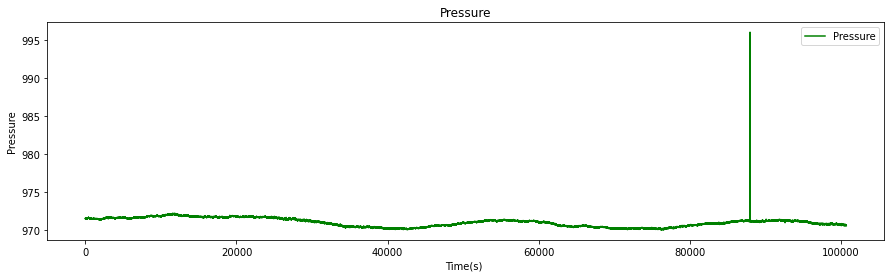

In [ ]:
plt.rcParams['figure.figsize'] = (15, 4)
plt.title('Pressure')
plt.xlabel('Time(s) ')
plt.ylabel('Pressure')
ax =data['Pressure']
plt.plot(ax, label = 'Pressure', color = 'green')
plt.legend()

기압의 최대, 최소, 평균 알아보기

In [ ]:
maximum = data['Pressure'].max()
minimum = data['Pressure'].min()
average = data['Pressure'].mean()

print('Maximum: ', maximum, '(Pressure)')
print('Minimum: ', minimum, '(Pressure)')
print('Average: ', average, '(Pressure)')

Maximum:  996.0297142000001 (Pressure)
Minimum:  970.0651999 (Pressure)
Average:  971.0471905546507 (Pressure)


각 피쳐(컬럼)별로 상관관계 알아보기.

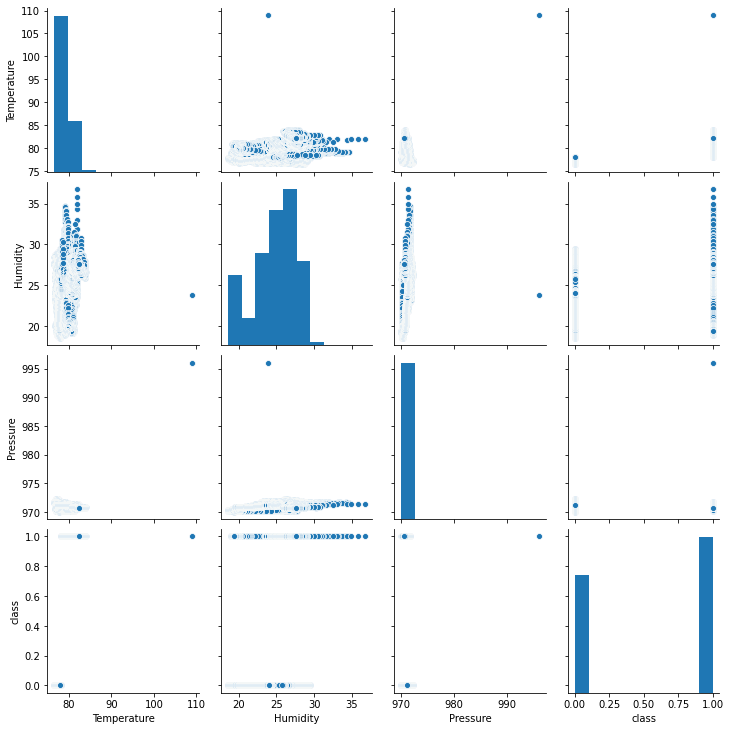

In [ ]:
data.dropna(inplace = True) # 혹시모를 null data를 drop 하기
data.drop_duplicates(inplace = True) # 중복되어 있는 것도 drop
sns.pairplot(data) # 상관관계를 그려주는 그래프

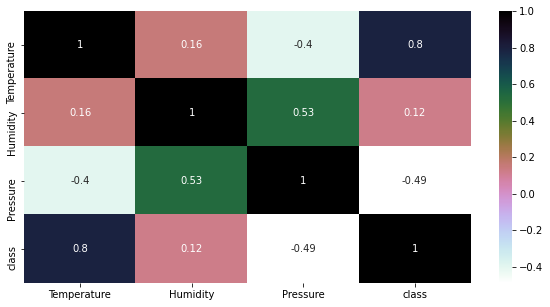

In [ ]:
plt.figure(figsize = (10, 5))
sns.heatmap(data.corr(), annot = True, cmap = 'cubehelix_r')
plt.show()

여기까지가 EDA 끝

### 머신러닝 

온도/습도/기압 데이터를 이용하여 학습시킨 후 예측을 해보겠다.
현재 data에 들어있는 데이터부터 확인하기.

In [ ]:
data.head()

,Date,Temperature,Humidity,Pressure,class
0,5/21/2019 4:43,79.705149,29.763173,971.557684,1
1,5/21/2019 4:43,79.611960,29.644341,971.594328,1
2,5/21/2019 4:43,79.602869,29.584354,971.582935,1
3,5/21/2019 4:43,79.600596,29.668567,971.561229,1
4,5/21/2019 4:43,79.589232,29.668746,971.584034,1


정답(class)를 빼서 데이터 프레임 x를, 그리고 정답을 갖는 데이터 프레임 y를 만들기.

In [ ]:
data2 = data[['Temperature', 'Humidity', 'Pressure', 'class']]

In [ ]:
data2.head()

,Temperature,Humidity,Pressure,class
0,79.705149,29.763173,971.557684,1
1,79.611960,29.644341,971.594328,1
2,79.602869,29.584354,971.582935,1
3,79.600596,29.668567,971.561229,1
4,79.589232,29.668746,971.584034,1


In [ ]:
x = data2.drop('class', axis = 1).values
print(x)
print('-----------------------------------------------')
y = data2['class'].values
print(y)

data2.head()

[[ 79.70514864  29.76317298 971.5576837 ]
 [ 79.61196046  29.64434119 971.5943276 ]
 [ 79.60286893  29.58435374 971.5829352 ]
 ...
 [ 82.26898164  27.50340858 970.7174237 ]
 [ 82.2814827   27.60574036 970.6951369 ]
 [ 82.29057438  27.62367204 970.6468546 ]]
-----------------------------------------------
[1 1 1 ... 1 1 1]


,Temperature,Humidity,Pressure,class
0,79.705149,29.763173,971.557684,1
1,79.611960,29.644341,971.594328,1
2,79.602869,29.584354,971.582935,1
3,79.600596,29.668567,971.561229,1
4,79.589232,29.668746,971.584034,1


입력 데이터 x와 정답 데이터 y를 적절하게 나누어서 학습용, 테스트용으로 구성하기.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4, random_state = 42, stratify = y )

k-NN 머신러닝 알고리즘을 이용하여 학습시키기.

In [ ]:
neighbors = np.arange(1, 9)
print(neighbors)
# 값을 저장할 배열을 미리 만들어 둠. 생성된 배열 값은 기존 메모리에 있는 값이 들어 있어서
# 이상한 값이 들어 있을 수 있음.

train_accuracy = np.empty(len(neighbors)) # np.empty: 초기값으로 생성
print(train_accuracy)

test_accuracy = np.empty(len(neighbors))
print(test_accuracy)

# enumerate() 참고링크--> https://blog.naver.com/pmw9440/222013436194 

for i, k  in enumerate(neighbors):  # enumerate(): 순서가 있는 자료형(리스트, 튜플, 문자열)을 입력받아 인덱스와 값을 포함하는 enumerate 객체를 리턴하는 함수
  print(i+ 1, k) # i는 인덱스 번호, 즉 순서를 가리킨다.
  knn = KNeighborsClassifier(n_neighbors = k)

  knn.fit(x_train, y_train)

  train_accuracy[i] = knn.score(x_train, y_train)
  test_accuracy[i] = knn.score(x_test, y_test)
  print(train_accuracy[i], test_accuracy[i])



[1 2 3 4 5 6 7 8]
[4.9e-324 9.9e-324 1.5e-323 2.0e-323 2.5e-323 3.0e-323 3.5e-323 4.0e-323]
[4.9e-324 9.9e-324 1.5e-323 2.0e-323 2.5e-323 3.0e-323 3.5e-323 4.0e-323]
1 1
1.0 0.9978377034919846
2 2
0.9991880965005302 0.9976140176463278
3 3
0.9991715270413574 0.9977382875605816
4 4
0.9988898462354189 0.9977382875605816
5 5
0.9989064156945917 0.9976885795948801
6 6
0.9985750265111347 0.9974648937492233
7 7
0.9986247348886532 0.9976140176463278
8 8
0.9984093319194062 0.9973654778178203


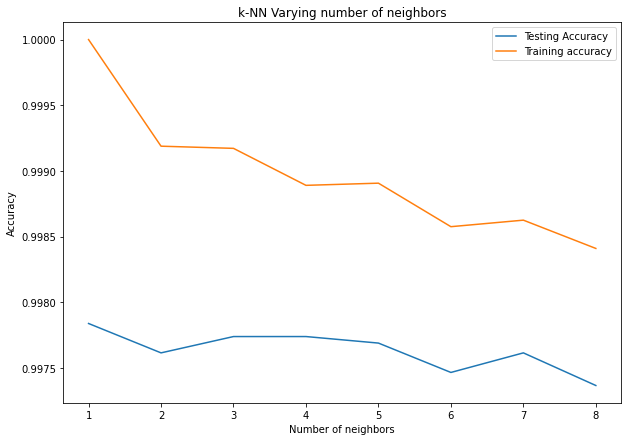

In [ ]:
plt.figure(figsize = (10, 7))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(x_train, y_train)
score = knn.score(x_test, y_test)
print(score)

0.9978377034919846


In [ ]:
y_pred = knn.predict(x_test)
print('예측한 값: ', y_pred)

예측한 값:  [1 0 1 ... 1 1 0]


몇개를 틀렸는지 확인하기 confusion으로

In [ ]:
confusion_matrix(y_test, y_pred)

array([[17301,    41],
       [   46, 22847]])

실제로 positive(1)인데 positive(1)로 예측한 것은 17301개, 0으로 잘못 예측한 수는 41개입니다.
실제로 negative(0)인데 positive(1)로 잘못 예측한 것은 46개, 0으로 잘 예측한 것은 22847개입니다.

In [ ]:
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,17301,41,17342
1,46,22847,22893
All,17347,22888,40235
